In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [3]:
import pandas as pd
import pyproj

In [4]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
from pathlib import Path

In [6]:
import joblib

In [7]:
from mt_function_yl import *

In [8]:
import seaborn as sn

In [9]:
from scipy import stats

In [10]:
from tabulate import tabulate

In [11]:
import statsmodels.api as sm

In [166]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn


# For regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay

### Data loading

In [123]:
aa = pd.read_csv('/home/yelhe/script/mt/dataraw/dfaa.csv')

In [124]:
ttv = pd.read_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_sum_updated0323.csv')

In [125]:
accident = aa[['Nr','SV','LV','pd']]

In [126]:
ttv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nr              350 non-null    int64  
 1   dbusl           350 non-null    float64
 2   dtraml          350 non-null    float64
 3   dtrainl         350 non-null    float64
 4   dplight         350 non-null    float64
 5   dstation        350 non-null    float64
 6   dparkcar        350 non-null    float64
 7   dparktw         350 non-null    float64
 8   dpedcro         350 non-null    float64
 9   dstopsign       350 non-null    float64
 10  dcurb           350 non-null    float64
 11  dgvm            350 non-null    float64
 12  gvm_dwv         350 non-null    int64  
 13  gvm_msp         350 non-null    int64  
 14  gvm_asp         350 non-null    int64  
 15  curbtype        350 non-null    int64  
 16  z_stznr         350 non-null    int64  
 17  z_qnr           350 non-null    int

In [127]:
tt_dist = ttv[['Nr', 
               'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar',
               'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad', 
               'droad_sl', 'dvfpath']]
tt_attr = ttv[['Nr','gvm_dwv', 'gvm_msp', 'gvm_asp', 'curbtype', 'z_stznr', 'z_qnr',
               'z_knr', 'trafficarea', 'r_width', 'r_surface', 'speedlimit', 
               'bicyclecount', 'carcount']]

In [128]:
c1 = ['dbusl', 'dtraml', 'dtrainl', 'dplight', 
      'dstation', 'dparkcar', 'dparktw', 'dpedcro',
      'dstopsign', 'dcurb', 'dtrafficarea', 'droad', 
      'droad_sl', 'dvfpath']
c2 = ['gvm_dwv', 'gvm_msp', 'gvm_asp', 'curbtype',
      'z_stznr', 'z_qnr', 'z_knr', 'trafficarea',
      'r_width', 'r_surface', 'speedlimit', 'bicyclecount',
      'carcount']

### Distribution Check

Text(0.5, 1.0, 'dvfpath')

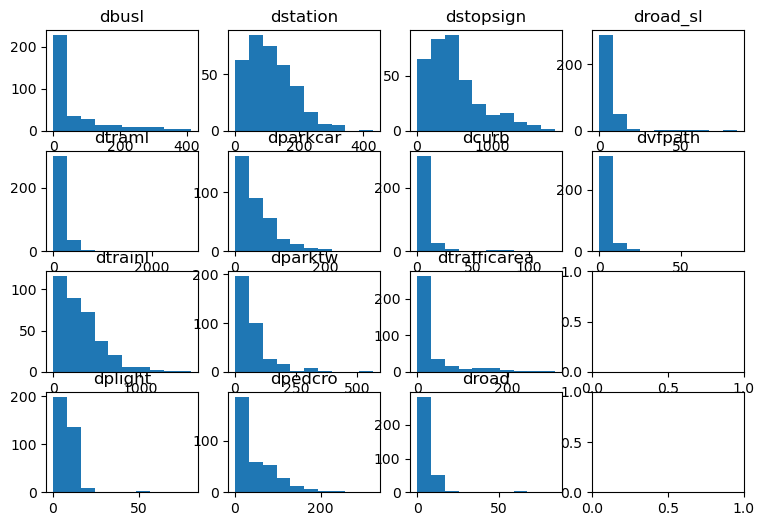

In [129]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 2*3))
axes[0,0].hist(tt_dist[c1[0]])
axes[0,0].set_title(c1[0])
axes[1,0].hist(tt_dist[c1[1]])
axes[1,0].set_title(c1[1])
axes[2,0].hist(tt_dist[c1[2]])
axes[2,0].set_title(c1[2])
axes[3,0].hist(tt_dist[c1[3]])
axes[3,0].set_title(c1[3])
axes[0,1].hist(tt_dist[c1[4]])
axes[0,1].set_title(c1[4])
axes[1,1].hist(tt_dist[c1[5]])
axes[1,1].set_title(c1[5])
axes[2,1].hist(tt_dist[c1[6]])
axes[2,1].set_title(c1[6])
axes[3,1].hist(tt_dist[c1[7]])
axes[3,1].set_title(c1[7])
axes[0,2].hist(tt_dist[c1[8]])
axes[0,2].set_title(c1[8])
axes[1,2].hist(tt_dist[c1[9]])
axes[1,2].set_title(c1[9])
axes[2,2].hist(tt_dist[c1[10]])
axes[2,2].set_title(c1[10])
axes[3,2].hist(tt_dist[c1[11]])
axes[3,2].set_title(c1[11])
axes[0,3].hist(tt_dist[c1[12]])
axes[0,3].set_title(c1[12])
axes[1,3].hist(tt_dist[c1[13]])
axes[1,3].set_title(c1[13])


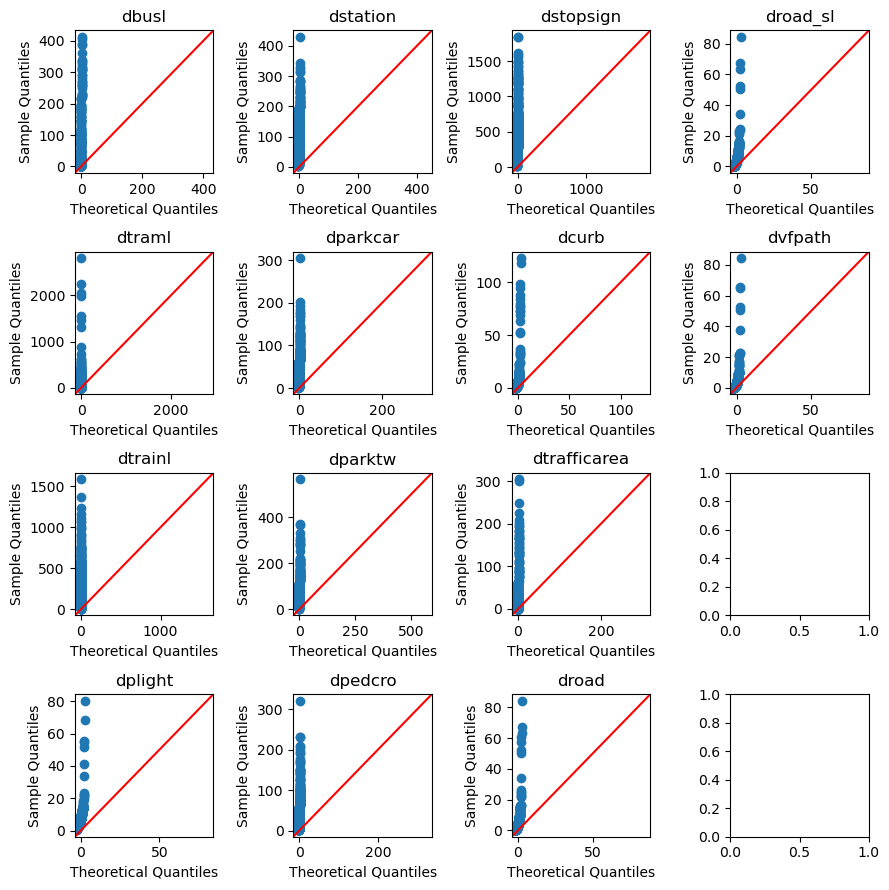

In [130]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 3*3))
sm.qqplot(tt_dist[c1[0]], line = '45', ax = axes[0,0])
axes[0,0].set_title(c1[0])
sm.qqplot(tt_dist[c1[1]], line = '45', ax = axes[1,0])
axes[1,0].set_title(c1[1])
sm.qqplot(tt_dist[c1[2]], line = '45', ax = axes[2,0])
axes[2,0].set_title(c1[2])
sm.qqplot(tt_dist[c1[3]], line = '45', ax = axes[3,0])
axes[3,0].set_title(c1[3])
sm.qqplot(tt_dist[c1[4]], line = '45', ax = axes[0,1])
axes[0,1].set_title(c1[4])
sm.qqplot(tt_dist[c1[5]], line = '45', ax = axes[1,1])
axes[1,1].set_title(c1[5])
sm.qqplot(tt_dist[c1[6]], line = '45', ax = axes[2,1])
axes[2,1].set_title(c1[6])
sm.qqplot(tt_dist[c1[7]], line = '45', ax = axes[3,1])
axes[3,1].set_title(c1[7])
sm.qqplot(tt_dist[c1[8]], line = '45', ax = axes[0,2])
axes[0,2].set_title(c1[8])
sm.qqplot(tt_dist[c1[9]], line = '45', ax = axes[1,2])
axes[1,2].set_title(c1[9])
sm.qqplot(tt_dist[c1[10]], line = '45', ax = axes[2,2])
axes[2,2].set_title(c1[10])
sm.qqplot(tt_dist[c1[11]], line = '45', ax = axes[3,2])
axes[3,2].set_title(c1[11])
sm.qqplot(tt_dist[c1[12]], line = '45', ax = axes[0,3])
axes[0,3].set_title(c1[12])
sm.qqplot(tt_dist[c1[13]], line = '45', ax = axes[1,3])
axes[1,3].set_title(c1[13])

plt.tight_layout()

In [131]:
res_0 = stats.normaltest(tt_dist[c1[0]])
res_1 = stats.normaltest(tt_dist[c1[1]])
res_2 = stats.normaltest(tt_dist[c1[2]])
res_3 = stats.normaltest(tt_dist[c1[3]])
res_4 = stats.normaltest(tt_dist[c1[4]])
res_5 = stats.normaltest(tt_dist[c1[5]])
res_6 = stats.normaltest(tt_dist[c1[6]])
res_7 = stats.normaltest(tt_dist[c1[7]])
res_8 = stats.normaltest(tt_dist[c1[8]])
res_9 = stats.normaltest(tt_dist[c1[9]])
res_10 = stats.normaltest(tt_dist[c1[10]])
res_11 = stats.normaltest(tt_dist[c1[11]])
res_12 = stats.normaltest(tt_dist[c1[12]])
res_13 = stats.normaltest(tt_dist[c1[13]])

In [132]:
print(c1[0], res_0.pvalue, '\n',
      c1[1], res_1.pvalue, '\n',
      c1[2], res_2.pvalue, '\n',
      c1[3], res_3.pvalue, '\n',
      c1[4], res_4.pvalue, '\n',
      c1[5], res_5.pvalue, '\n',
      c1[6], res_6.pvalue, '\n',
      c1[7], res_7.pvalue, '\n',
      c1[8], res_8.pvalue, '\n',
      c1[9], res_9.pvalue, '\n',
      c1[10], res_10.pvalue, '\n',
      c1[11], res_11.pvalue, '\n',
      c1[12], res_12.pvalue, '\n',
      c1[13], res_13.pvalue, '\n')

dbusl 1.2020328960509866e-29 
 dtraml 2.593298020888975e-88 
 dtrainl 5.33943308185956e-23 
 dplight 1.27312301391403e-86 
 dstation 1.3415521215647481e-09 
 dparkcar 2.6183005080168015e-31 
 dparktw 5.041867083315586e-48 
 dpedcro 2.0263501194494847e-28 
 dstopsign 3.7822510585965976e-15 
 dcurb 6.322733543545959e-73 
 dtrafficarea 3.54163531420676e-44 
 droad 1.9466534250335635e-82 
 droad_sl 6.328959960226583e-90 
 dvfpath 9.17162134173314e-95 



### Variables Transformation

In [133]:
tt_dist_log = tt_dist.copy(deep = True)
tt_dist_log[c1[0]] = np.log(tt_dist_log[c1[0]]).replace(-np.inf, 0)
tt_dist_log[c1[1]] = np.log(tt_dist_log[c1[1]]).replace(-np.inf, 0)
tt_dist_log[c1[2]] = np.log(tt_dist_log[c1[2]]).replace(-np.inf, 0)
tt_dist_log[c1[3]] = np.log(tt_dist_log[c1[3]]).replace(-np.inf, 0)
tt_dist_log[c1[4]] = np.log(tt_dist_log[c1[4]]).replace(-np.inf, 0)
tt_dist_log[c1[5]] = np.log(tt_dist_log[c1[5]]).replace(-np.inf, 0)
tt_dist_log[c1[6]] = np.log(tt_dist_log[c1[6]]).replace(-np.inf, 0)
tt_dist_log[c1[7]] = np.log(tt_dist_log[c1[7]]).replace(-np.inf, 0)
tt_dist_log[c1[8]] = np.log(tt_dist_log[c1[8]]).replace(-np.inf, 0)
tt_dist_log[c1[9]] = np.log(tt_dist_log[c1[9]]).replace(-np.inf, 0)
tt_dist_log[c1[10]] = np.log(tt_dist_log[c1[10]]).replace(-np.inf, 0)
tt_dist_log[c1[11]] = np.log(tt_dist_log[c1[11]]).replace(-np.inf, 0)
tt_dist_log[c1[12]] = np.log(tt_dist_log[c1[12]]).replace(-np.inf, 0)
tt_dist_log[c1[13]] = np.log(tt_dist_log[c1[13]]).replace(-np.inf, 0)

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'dvfpath')

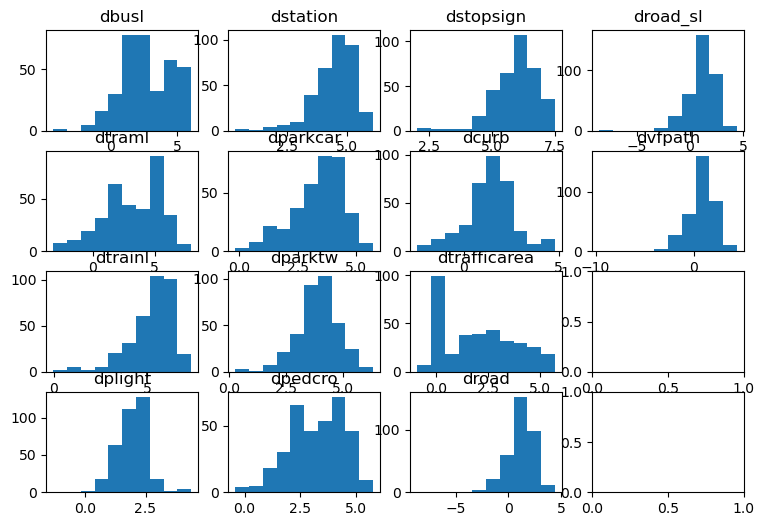

In [134]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 2*3))
axes[0,0].hist(tt_dist_log[c1[0]])
axes[0,0].set_title(c1[0])
axes[1,0].hist(tt_dist_log[c1[1]])
axes[1,0].set_title(c1[1])
axes[2,0].hist(tt_dist_log[c1[2]])
axes[2,0].set_title(c1[2])
axes[3,0].hist(tt_dist_log[c1[3]])
axes[3,0].set_title(c1[3])
axes[0,1].hist(tt_dist_log[c1[4]])
axes[0,1].set_title(c1[4])
axes[1,1].hist(tt_dist_log[c1[5]])
axes[1,1].set_title(c1[5])
axes[2,1].hist(tt_dist_log[c1[6]])
axes[2,1].set_title(c1[6])
axes[3,1].hist(tt_dist_log[c1[7]])
axes[3,1].set_title(c1[7])
axes[0,2].hist(tt_dist_log[c1[8]])
axes[0,2].set_title(c1[8])
axes[1,2].hist(tt_dist_log[c1[9]])
axes[1,2].set_title(c1[9])
axes[2,2].hist(tt_dist_log[c1[10]])
axes[2,2].set_title(c1[10])
axes[3,2].hist(tt_dist_log[c1[11]])
axes[3,2].set_title(c1[11])
axes[0,3].hist(tt_dist_log[c1[12]])
axes[0,3].set_title(c1[12])
axes[1,3].hist(tt_dist_log[c1[13]])
axes[1,3].set_title(c1[13])


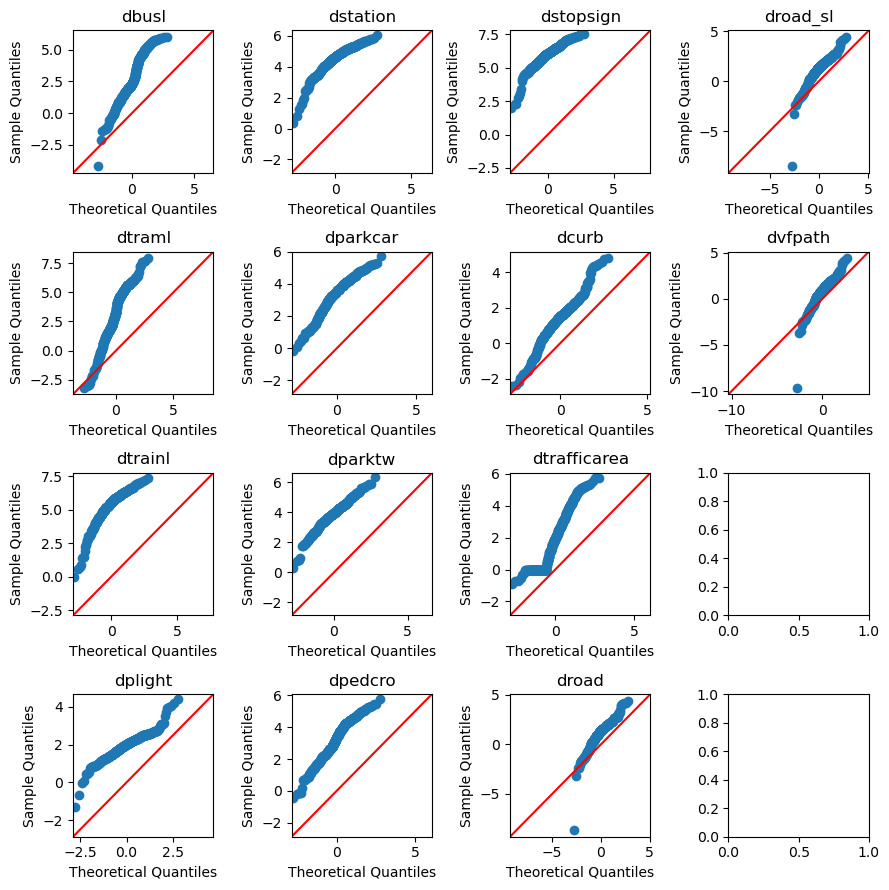

In [135]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 3*3))
sm.qqplot(tt_dist_log[c1[0]], line = '45', ax = axes[0,0])
axes[0,0].set_title(c1[0])
sm.qqplot(tt_dist_log[c1[1]], line = '45', ax = axes[1,0])
axes[1,0].set_title(c1[1])
sm.qqplot(tt_dist_log[c1[2]], line = '45', ax = axes[2,0])
axes[2,0].set_title(c1[2])
sm.qqplot(tt_dist_log[c1[3]], line = '45', ax = axes[3,0])
axes[3,0].set_title(c1[3])
sm.qqplot(tt_dist_log[c1[4]], line = '45', ax = axes[0,1])
axes[0,1].set_title(c1[4])
sm.qqplot(tt_dist_log[c1[5]], line = '45', ax = axes[1,1])
axes[1,1].set_title(c1[5])
sm.qqplot(tt_dist_log[c1[6]], line = '45', ax = axes[2,1])
axes[2,1].set_title(c1[6])
sm.qqplot(tt_dist_log[c1[7]], line = '45', ax = axes[3,1])
axes[3,1].set_title(c1[7])
sm.qqplot(tt_dist_log[c1[8]], line = '45', ax = axes[0,2])
axes[0,2].set_title(c1[8])
sm.qqplot(tt_dist_log[c1[9]], line = '45', ax = axes[1,2])
axes[1,2].set_title(c1[9])
sm.qqplot(tt_dist_log[c1[10]], line = '45', ax = axes[2,2])
axes[2,2].set_title(c1[10])
sm.qqplot(tt_dist_log[c1[11]], line = '45', ax = axes[3,2])
axes[3,2].set_title(c1[11])
sm.qqplot(tt_dist_log[c1[12]], line = '45', ax = axes[0,3])
axes[0,3].set_title(c1[12])
sm.qqplot(tt_dist_log[c1[13]], line = '45', ax = axes[1,3])
axes[1,3].set_title(c1[13])
plt.tight_layout()

In [136]:
lres_0 = stats.normaltest(tt_dist_log[c1[0]])
lres_1 = stats.normaltest(tt_dist_log[c1[1]])
lres_2 = stats.normaltest(tt_dist_log[c1[2]])
lres_3 = stats.normaltest(tt_dist_log[c1[3]])
lres_4 = stats.normaltest(tt_dist_log[c1[4]])
lres_5 = stats.normaltest(tt_dist_log[c1[5]])
lres_6 = stats.normaltest(tt_dist_log[c1[6]])
lres_7 = stats.normaltest(tt_dist_log[c1[7]])
lres_8 = stats.normaltest(tt_dist_log[c1[8]])
lres_9 = stats.normaltest(tt_dist_log[c1[9]])
lres_10 = stats.normaltest(tt_dist_log[c1[10]])
lres_11 = stats.normaltest(tt_dist_log[c1[11]])
lres_12 = stats.normaltest(tt_dist_log[c1[12]])
lres_13 = stats.normaltest(tt_dist_log[c1[13]])

In [137]:
print(c1[0], lres_0.pvalue, '\n',
      c1[1], lres_1.pvalue, '\n',
      c1[2], lres_2.pvalue, '\n',
      c1[3], lres_3.pvalue, '\n',
      c1[4], lres_4.pvalue, '\n',
      c1[5], lres_5.pvalue, '\n',
      c1[6], lres_6.pvalue, '\n',
      c1[7], lres_7.pvalue, '\n',
      c1[8], lres_8.pvalue, '\n',
      c1[9], lres_9.pvalue, '\n',
      c1[10], lres_10.pvalue, '\n',
      c1[11], lres_11.pvalue, '\n',
      c1[12], lres_12.pvalue, '\n',
      c1[13], lres_13.pvalue, '\n')

dbusl 0.045994850959473046 
 dtraml 0.00020430041448337246 
 dtrainl 8.527945188590559e-23 
 dplight 1.670897809740079e-08 
 dstation 1.366035165602116e-21 
 dparkcar 2.1011903496977946e-06 
 dparktw 2.3017085581361872e-05 
 dpedcro 0.0009663063413348835 
 dstopsign 2.0751880117515198e-19 
 dcurb 0.00827802762527894 
 dtrafficarea 5.7349756060568476e-34 
 droad 2.4739619368424195e-32 
 droad_sl 1.4181294965928802e-33 
 dvfpath 1.920415294137469e-30 



In [138]:
# Yeojohnson Transformation

In [139]:
tt_dist_yj = tt_dist.copy(deep = True)
tt_dist_yj[c1[0]], l0  = stats.yeojohnson(tt_dist_yj[c1[0]])
tt_dist_yj[c1[1]], l1  = stats.yeojohnson(tt_dist_yj[c1[1]])
tt_dist_yj[c1[2]], l2  = stats.yeojohnson(tt_dist_yj[c1[2]])
tt_dist_yj[c1[3]], l3  = stats.yeojohnson(tt_dist_yj[c1[3]])
tt_dist_yj[c1[4]], l4  = stats.yeojohnson(tt_dist_yj[c1[4]])
tt_dist_yj[c1[5]], l5  = stats.yeojohnson(tt_dist_yj[c1[5]])
tt_dist_yj[c1[6]], l6  = stats.yeojohnson(tt_dist_yj[c1[6]])
tt_dist_yj[c1[7]], l7  = stats.yeojohnson(tt_dist_yj[c1[7]])
tt_dist_yj[c1[8]], l8  = stats.yeojohnson(tt_dist_yj[c1[8]])
tt_dist_yj[c1[9]], l9  = stats.yeojohnson(tt_dist_yj[c1[9]])
tt_dist_yj[c1[10]], l10  = stats.yeojohnson(tt_dist_yj[c1[10]])
tt_dist_yj[c1[11]], l11  = stats.yeojohnson(tt_dist_yj[c1[11]])
tt_dist_yj[c1[12]], l12  = stats.yeojohnson(tt_dist_yj[c1[12]])
tt_dist_yj[c1[13]], l13  = stats.yeojohnson(tt_dist_yj[c1[13]])

Text(0.5, 1.0, 'dvfpath')

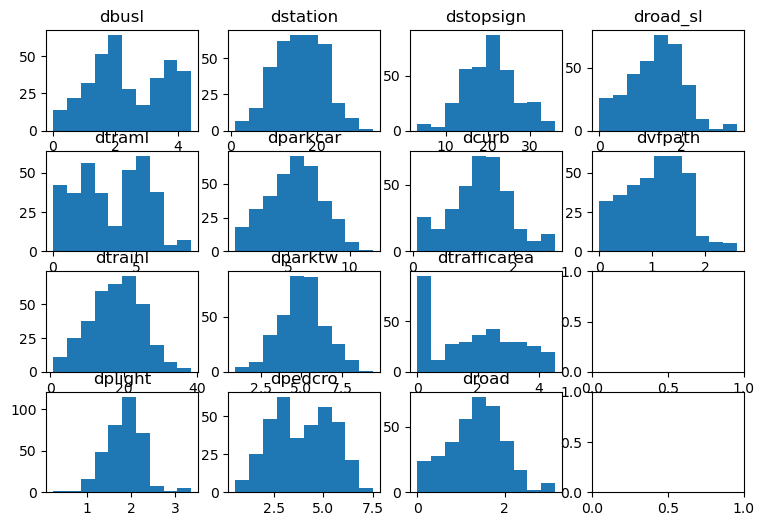

In [140]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 2*3))
axes[0,0].hist(tt_dist_yj[c1[0]])
axes[0,0].set_title(c1[0])
axes[1,0].hist(tt_dist_yj[c1[1]])
axes[1,0].set_title(c1[1])
axes[2,0].hist(tt_dist_yj[c1[2]])
axes[2,0].set_title(c1[2])
axes[3,0].hist(tt_dist_yj[c1[3]])
axes[3,0].set_title(c1[3])
axes[0,1].hist(tt_dist_yj[c1[4]])
axes[0,1].set_title(c1[4])
axes[1,1].hist(tt_dist_yj[c1[5]])
axes[1,1].set_title(c1[5])
axes[2,1].hist(tt_dist_yj[c1[6]])
axes[2,1].set_title(c1[6])
axes[3,1].hist(tt_dist_yj[c1[7]])
axes[3,1].set_title(c1[7])
axes[0,2].hist(tt_dist_yj[c1[8]])
axes[0,2].set_title(c1[8])
axes[1,2].hist(tt_dist_yj[c1[9]])
axes[1,2].set_title(c1[9])
axes[2,2].hist(tt_dist_yj[c1[10]])
axes[2,2].set_title(c1[10])
axes[3,2].hist(tt_dist_yj[c1[11]])
axes[3,2].set_title(c1[11])
axes[0,3].hist(tt_dist_yj[c1[12]])
axes[0,3].set_title(c1[12])
axes[1,3].hist(tt_dist_yj[c1[13]])
axes[1,3].set_title(c1[13])


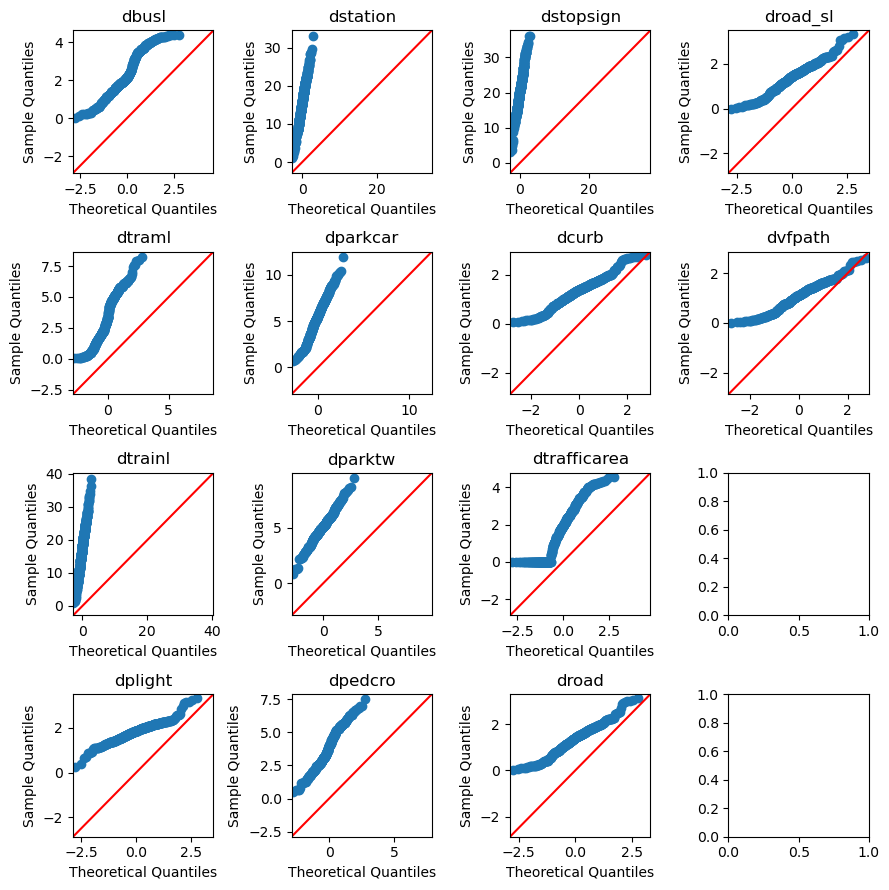

In [141]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 3*3))
sm.qqplot(tt_dist_yj[c1[0]], line = '45', ax = axes[0,0])
axes[0,0].set_title(c1[0])
sm.qqplot(tt_dist_yj[c1[1]], line = '45', ax = axes[1,0])
axes[1,0].set_title(c1[1])
sm.qqplot(tt_dist_yj[c1[2]], line = '45', ax = axes[2,0])
axes[2,0].set_title(c1[2])
sm.qqplot(tt_dist_yj[c1[3]], line = '45', ax = axes[3,0])
axes[3,0].set_title(c1[3])
sm.qqplot(tt_dist_yj[c1[4]], line = '45', ax = axes[0,1])
axes[0,1].set_title(c1[4])
sm.qqplot(tt_dist_yj[c1[5]], line = '45', ax = axes[1,1])
axes[1,1].set_title(c1[5])
sm.qqplot(tt_dist_yj[c1[6]], line = '45', ax = axes[2,1])
axes[2,1].set_title(c1[6])
sm.qqplot(tt_dist_yj[c1[7]], line = '45', ax = axes[3,1])
axes[3,1].set_title(c1[7])
sm.qqplot(tt_dist_yj[c1[8]], line = '45', ax = axes[0,2])
axes[0,2].set_title(c1[8])
sm.qqplot(tt_dist_yj[c1[9]], line = '45', ax = axes[1,2])
axes[1,2].set_title(c1[9])
sm.qqplot(tt_dist_yj[c1[10]], line = '45', ax = axes[2,2])
axes[2,2].set_title(c1[10])
sm.qqplot(tt_dist_yj[c1[11]], line = '45', ax = axes[3,2])
axes[3,2].set_title(c1[11])
sm.qqplot(tt_dist_yj[c1[12]], line = '45', ax = axes[0,3])
axes[0,3].set_title(c1[12])
sm.qqplot(tt_dist_yj[c1[13]], line = '45', ax = axes[1,3])
axes[1,3].set_title(c1[13])
plt.tight_layout()

In [142]:
yjres_0 = stats.normaltest(tt_dist_yj[c1[0]])
yjres_1 = stats.normaltest(tt_dist_yj[c1[1]])
yjres_2 = stats.normaltest(tt_dist_yj[c1[2]])
yjres_3 = stats.normaltest(tt_dist_yj[c1[3]])
yjres_4 = stats.normaltest(tt_dist_yj[c1[4]])
yjres_5 = stats.normaltest(tt_dist_yj[c1[5]])
yjres_6 = stats.normaltest(tt_dist_yj[c1[6]])
yjres_7 = stats.normaltest(tt_dist_yj[c1[7]])
yjres_8 = stats.normaltest(tt_dist_yj[c1[8]])
yjres_9 = stats.normaltest(tt_dist_yj[c1[9]])
yjres_10 = stats.normaltest(tt_dist_yj[c1[10]])
yjres_11 = stats.normaltest(tt_dist_yj[c1[11]])
yjres_12 = stats.normaltest(tt_dist_yj[c1[12]])
yjres_13 = stats.normaltest(tt_dist_yj[c1[13]])

In [143]:
print(c1[0], yjres_0.pvalue, '\n',
      c1[1], yjres_1.pvalue, '\n',
      c1[2], yjres_2.pvalue, '\n',
      c1[3], yjres_3.pvalue, '\n',
      c1[4], yjres_4.pvalue, '\n',
      c1[5], yjres_5.pvalue, '\n',
      c1[6], yjres_6.pvalue, '\n',
      c1[7], yjres_7.pvalue, '\n',
      c1[8], yjres_8.pvalue, '\n',
      c1[9], yjres_9.pvalue, '\n',
      c1[10], yjres_10.pvalue, '\n',
      c1[11], yjres_11.pvalue, '\n',
      c1[12], yjres_12.pvalue, '\n',
      c1[13], yjres_13.pvalue, '\n')

dbusl 1.6163813810975464e-30 
 dtraml 1.770001186228528e-33 
 dtrainl 0.5034730281244644 
 dplight 0.0005242452639216105 
 dstation 0.29886627750503636 
 dparkcar 0.03890483943918012 
 dparktw 0.6683427979712476 
 dpedcro 6.831526084563053e-12 
 dstopsign 0.9901593390320329 
 dcurb 0.9987496387153637 
 dtrafficarea 6.920101113189877e-58 
 droad 0.7312868268692821 
 droad_sl 0.8184919537735965 
 dvfpath 0.036976699173602745 



### Variables Standardization

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
tt_dist_st = tt_dist_yj.copy(deep = True)
tt_dist_st[c1[0]]  = stats.zscore(tt_dist_st[c1[0]])
tt_dist_st[c1[1]]  = stats.zscore(tt_dist_st[c1[1]])
tt_dist_st[c1[2]]  = stats.zscore(tt_dist_st[c1[2]])
tt_dist_st[c1[3]]  = stats.zscore(tt_dist_st[c1[3]])
tt_dist_st[c1[4]]  = stats.zscore(tt_dist_st[c1[4]])
tt_dist_st[c1[5]]  = stats.zscore(tt_dist_st[c1[5]])
tt_dist_st[c1[6]]  = stats.zscore(tt_dist_st[c1[6]])
tt_dist_st[c1[7]]  = stats.zscore(tt_dist_st[c1[7]])
tt_dist_st[c1[8]]  = stats.zscore(tt_dist_st[c1[8]])
tt_dist_st[c1[9]]  = stats.zscore(tt_dist_st[c1[9]])
tt_dist_st[c1[10]]  = stats.zscore(tt_dist_st[c1[10]])
tt_dist_st[c1[11]]  = stats.zscore(tt_dist_st[c1[11]])
tt_dist_st[c1[12]]  = stats.zscore(tt_dist_st[c1[12]])
tt_dist_st[c1[13]]  = stats.zscore(tt_dist_st[c1[13]])

Text(0.5, 1.0, 'dvfpath')

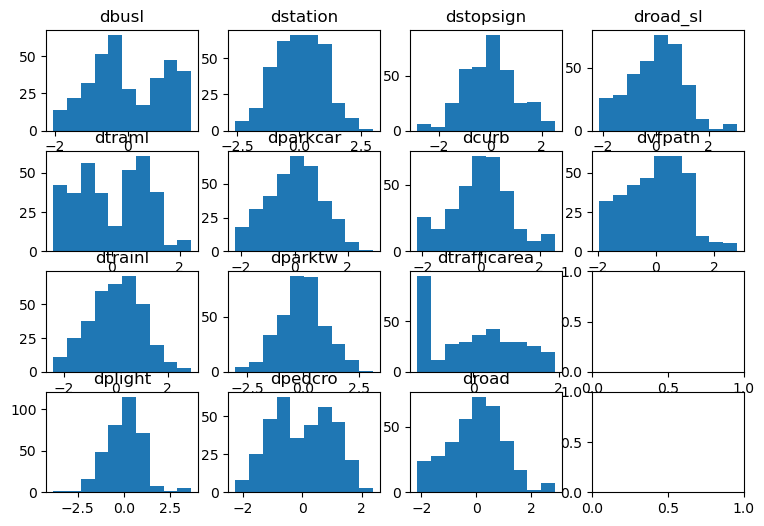

In [146]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 2*3))
axes[0,0].hist(tt_dist_st[c1[0]])
axes[0,0].set_title(c1[0])
axes[1,0].hist(tt_dist_st[c1[1]])
axes[1,0].set_title(c1[1])
axes[2,0].hist(tt_dist_st[c1[2]])
axes[2,0].set_title(c1[2])
axes[3,0].hist(tt_dist_st[c1[3]])
axes[3,0].set_title(c1[3])
axes[0,1].hist(tt_dist_st[c1[4]])
axes[0,1].set_title(c1[4])
axes[1,1].hist(tt_dist_st[c1[5]])
axes[1,1].set_title(c1[5])
axes[2,1].hist(tt_dist_st[c1[6]])
axes[2,1].set_title(c1[6])
axes[3,1].hist(tt_dist_st[c1[7]])
axes[3,1].set_title(c1[7])
axes[0,2].hist(tt_dist_st[c1[8]])
axes[0,2].set_title(c1[8])
axes[1,2].hist(tt_dist_st[c1[9]])
axes[1,2].set_title(c1[9])
axes[2,2].hist(tt_dist_st[c1[10]])
axes[2,2].set_title(c1[10])
axes[3,2].hist(tt_dist_st[c1[11]])
axes[3,2].set_title(c1[11])
axes[0,3].hist(tt_dist_st[c1[12]])
axes[0,3].set_title(c1[12])
axes[1,3].hist(tt_dist_st[c1[13]])
axes[1,3].set_title(c1[13])


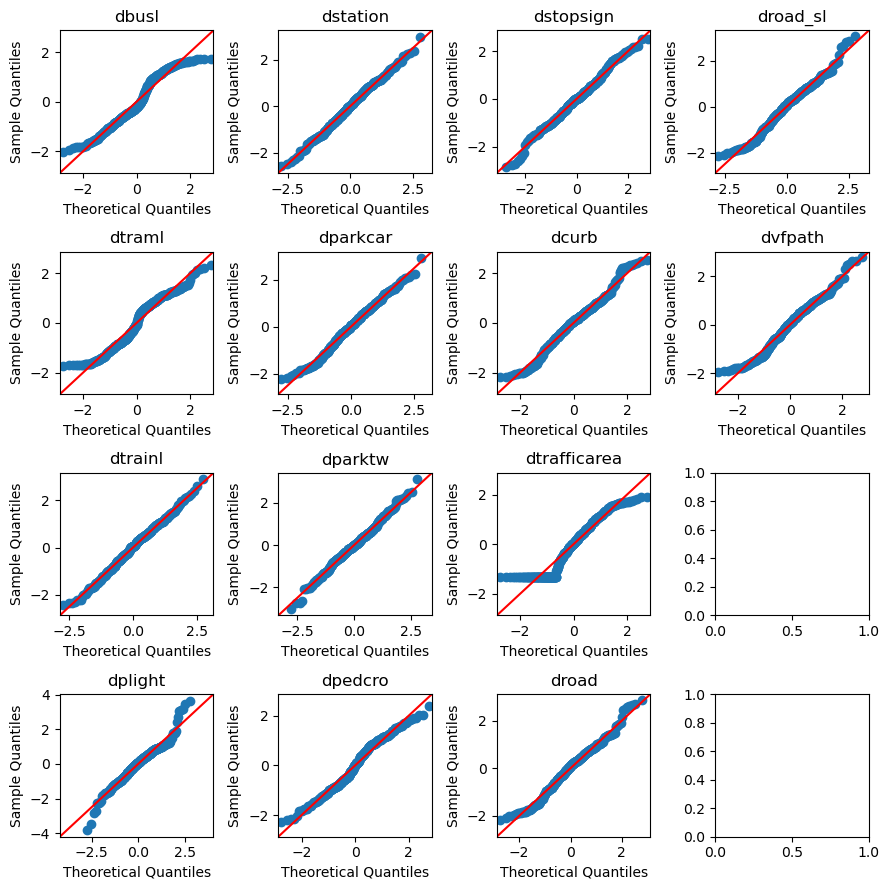

In [147]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 3*3))
sm.qqplot(tt_dist_st[c1[0]], line = '45', ax = axes[0,0])
axes[0,0].set_title(c1[0])
sm.qqplot(tt_dist_st[c1[1]], line = '45', ax = axes[1,0])
axes[1,0].set_title(c1[1])
sm.qqplot(tt_dist_st[c1[2]], line = '45', ax = axes[2,0])
axes[2,0].set_title(c1[2])
sm.qqplot(tt_dist_st[c1[3]], line = '45', ax = axes[3,0])
axes[3,0].set_title(c1[3])
sm.qqplot(tt_dist_st[c1[4]], line = '45', ax = axes[0,1])
axes[0,1].set_title(c1[4])
sm.qqplot(tt_dist_st[c1[5]], line = '45', ax = axes[1,1])
axes[1,1].set_title(c1[5])
sm.qqplot(tt_dist_st[c1[6]], line = '45', ax = axes[2,1])
axes[2,1].set_title(c1[6])
sm.qqplot(tt_dist_st[c1[7]], line = '45', ax = axes[3,1])
axes[3,1].set_title(c1[7])
sm.qqplot(tt_dist_st[c1[8]], line = '45', ax = axes[0,2])
axes[0,2].set_title(c1[8])
sm.qqplot(tt_dist_st[c1[9]], line = '45', ax = axes[1,2])
axes[1,2].set_title(c1[9])
sm.qqplot(tt_dist_st[c1[10]], line = '45', ax = axes[2,2])
axes[2,2].set_title(c1[10])
sm.qqplot(tt_dist_st[c1[11]], line = '45', ax = axes[3,2])
axes[3,2].set_title(c1[11])
sm.qqplot(tt_dist_st[c1[12]], line = '45', ax = axes[0,3])
axes[0,3].set_title(c1[12])
sm.qqplot(tt_dist_st[c1[13]], line = '45', ax = axes[1,3])
axes[1,3].set_title(c1[13])
plt.tight_layout()

In [148]:
stres_0 = stats.normaltest(tt_dist_st[c1[0]])
stres_1 = stats.normaltest(tt_dist_st[c1[1]])
stres_2 = stats.normaltest(tt_dist_st[c1[2]])
stres_3 = stats.normaltest(tt_dist_st[c1[3]])
stres_4 = stats.normaltest(tt_dist_st[c1[4]])
stres_5 = stats.normaltest(tt_dist_st[c1[5]])
stres_6 = stats.normaltest(tt_dist_st[c1[6]])
stres_7 = stats.normaltest(tt_dist_st[c1[7]])
stres_8 = stats.normaltest(tt_dist_st[c1[8]])
stres_9 = stats.normaltest(tt_dist_st[c1[9]])
stres_10 = stats.normaltest(tt_dist_st[c1[10]])
stres_11 = stats.normaltest(tt_dist_st[c1[11]])
stres_12 = stats.normaltest(tt_dist_st[c1[12]])
stres_13 = stats.normaltest(tt_dist_st[c1[13]])

In [149]:
print(c1[0], stres_0.pvalue, '\n',
      c1[1], stres_1.pvalue, '\n',
      c1[2], stres_2.pvalue, '\n',
      c1[3], stres_3.pvalue, '\n',
      c1[4], stres_4.pvalue, '\n',
      c1[5], stres_5.pvalue, '\n',
      c1[6], stres_6.pvalue, '\n',
      c1[7], stres_7.pvalue, '\n',
      c1[8], stres_8.pvalue, '\n',
      c1[9], stres_9.pvalue, '\n',
      c1[10], stres_10.pvalue, '\n',
      c1[11], stres_11.pvalue, '\n',
      c1[12], stres_12.pvalue, '\n',
      c1[13], stres_13.pvalue, '\n')

dbusl 1.6163813810980814e-30 
 dtraml 1.7700011862293435e-33 
 dtrainl 0.5034730281244642 
 dplight 0.0005242452639216093 
 dstation 0.29886627750503614 
 dparkcar 0.03890483943918084 
 dparktw 0.668342797971251 
 dpedcro 6.831526084563053e-12 
 dstopsign 0.9901593390320325 
 dcurb 0.9987496387153636 
 dtrafficarea 6.920101113185517e-58 
 droad 0.7312868268692777 
 droad_sl 0.8184919537735965 
 dvfpath 0.036976699173602745 



In [150]:
tt_dist_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nr            350 non-null    int64  
 1   dbusl         350 non-null    float64
 2   dtraml        350 non-null    float64
 3   dtrainl       350 non-null    float64
 4   dplight       350 non-null    float64
 5   dstation      350 non-null    float64
 6   dparkcar      350 non-null    float64
 7   dparktw       350 non-null    float64
 8   dpedcro       350 non-null    float64
 9   dstopsign     350 non-null    float64
 10  dcurb         350 non-null    float64
 11  dtrafficarea  350 non-null    float64
 12  droad         350 non-null    float64
 13  droad_sl      350 non-null    float64
 14  dvfpath       350 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 41.1 KB


In [151]:
# Distance variables after normalization and standardization
tt_dist_st.to_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_distance_norm_stand.csv', index = False)

### Regression

In [154]:
acc_ttdist = accident.merge(tt_dist_st, on = ['Nr'])

In [155]:
acc_ttdist

,Nr,SV,LV,pd,dbusl,dtraml,dtrainl,dplight,dstation,dparkcar,dparktw,dpedcro,dstopsign,dcurb,dtrafficarea,droad,droad_sl,dvfpath
0,99900060852597,0,1,15,0.396257,-0.119860,-0.760942,-0.995660,-1.408004,0.055068,1.600021,-0.987361,0.734418,-1.752466,-0.608660,-0.604692,-0.605390,-1.354771
1,99900063018611,1,0,0,-0.145889,1.382238,2.895791,-1.546878,-0.900337,1.119018,2.329570,0.922575,-1.919746,0.947033,1.112913,-1.343002,-1.346949,-1.385904
2,99900052723510,0,1,500,0.945795,0.724999,0.122800,0.411885,0.995345,-0.883092,0.484260,0.794847,0.638917,0.115940,-1.305449,0.263594,0.281910,0.589023
3,99900061514043,0,1,3000,-1.042366,0.598061,0.614803,0.418928,0.351359,-1.739233,1.329958,1.178437,1.494014,-0.812266,1.183275,-0.699602,-0.701314,-0.544839
4,99900063037843,1,0,200,0.635555,0.771691,2.595377,0.994665,0.760592,-1.135387,1.086626,1.392251,-0.210295,0.242780,-1.305449,0.399712,0.422626,0.718931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,99900055905276,0,1,0,-0.144309,-1.155351,1.791947,-2.834315,0.019810,0.743195,2.500649,0.390256,1.093929,0.889006,-0.795319,1.115097,1.170118,1.376359
346,99900060670975,0,1,200,1.332145,0.844334,1.432348,-0.074568,0.928721,-1.000687,1.722981,-1.116375,0.620443,-0.193214,-1.305449,-0.063878,-0.054782,0.270681
347,99900047367168,0,3,4400,1.548064,-0.779092,1.261430,0.061233,-1.308186,2.195033,1.318132,1.744954,-0.200431,0.644934,1.051605,0.837090,0.878001,0.598701
348,99900050714619,1,0,0,1.239789,0.737543,0.704704,-0.233468,0.596602,-1.377652,0.317766,1.521424,0.548412,-0.178218,-1.305449,-0.063049,-0.053930,0.270327


In [161]:
Y1 = acc_ttdist['SV']
X = acc_ttdist[c1]
X = sm.add_constant(X)
model1 = sm.OLS(Y1, X)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SV   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8308
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.635
Time:                        21:51:03   Log-Likelihood:                -146.78
No. Observations:                 350   AIC:                             323.6
Df Residuals:                     335   BIC:                             381.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1686      0.020      8.383      0.000       0.129       0.208
dbusl           -0.0005      0.024     -0.023      0.982      -0.047       0.046
dtraml          -0.0144      0.023     -0.624      0.533      -0.060       0.031
dtrainl         -0.0175      0.021     -0.816      0.415      -0.060       0.025
dplight         -0.0220      0.022     -1.002      0.317      -0.065       0.021
dstation         0.0344      0.024      1.445      0.149      -0.012       0.081
dparkcar         0.0183      0.024      0.768      0.443      -0.029       0.065
dparktw          0.0098      0.023      0.432      0.666      -0.035       0.054
dpedcro          0.0053      0.022      0.241      0.810      -0.038       0.048
dstopsign        0.0055      0.021      0.258      0.797      -0.037       0.048
dcurb           -0.0113      0.031     -0.363      0.717      -0.072       0.050
dtrafficarea     0.0092      0.023      0.396      0.692      -0.036       0.055
droad            0.2208      0.115      1.917      0.056      -0.006       0.447
droad_sl        -0.1966      0.118     -1.659      0.098      -0.430       0.036
dvfpath         -0.0047      0.029     -0.164      0.870      -0.061       0.052
==============================================================================
Omnibus:                      103.721   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.101
Skew:                           1.732   Prob(JB):                     2.61e-43
Kurtosis:                       4.205   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
Y2 = acc_ttdist['LV']
X = acc_ttdist[c1]
X = sm.add_constant(X)
model2 = sm.OLS(Y2, X)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LV   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.165
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.301
Time:                        21:51:58   Log-Likelihood:                -291.66
No. Observations:                 350   AIC:                             613.3
Df Residuals:                     335   BIC:                             671.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7914      0.030     26.017      0.000       0.732       0.851
dbusl            0.0043      0.036      0.120      0.905      -0.066       0.075
dtraml          -0.0230      0.035     -0.656      0.512      -0.092       0.046
dtrainl          0.0494      0.032      1.521      0.129      -0.014       0.113
dplight          0.0225      0.033      0.677      0.499      -0.043       0.088
dstation        -0.0672      0.036     -1.866      0.063      -0.138       0.004
dparkcar         0.0170      0.036      0.471      0.638      -0.054       0.088
dparktw          0.0176      0.034      0.514      0.608      -0.050       0.085
dpedcro          0.0390      0.033      1.178      0.239      -0.026       0.104
dstopsign       -0.0381      0.032     -1.176      0.240      -0.102       0.026
dcurb            0.0024      0.047      0.052      0.959      -0.090       0.095
dtrafficarea    -0.0267      0.035     -0.765      0.445      -0.095       0.042
droad           -0.2925      0.174     -1.679      0.094      -0.635       0.050
droad_sl         0.3651      0.179      2.037      0.042       0.013       0.718
dvfpath         -0.0303      0.043     -0.701      0.484      -0.115       0.055
==============================================================================
Omnibus:                        4.535   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                4.676
Skew:                           0.177   Prob(JB):                       0.0965
Kurtosis:                       3.442   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
Y3 = acc_ttdist['pd']
X = acc_ttdist[c1]
X = sm.add_constant(X)
model3 = sm.OLS(Y3, X)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pd   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.219
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.259
Time:                        21:51:58   Log-Likelihood:                -3312.1
No. Observations:                 350   AIC:                             6654.
Df Residuals:                     335   BIC:                             6712.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          978.9600    170.251      5.750      0.000     644.065    1313.855
dbusl         -358.4718    201.211     -1.782      0.076    -754.267      37.324
dtraml         145.1597    195.880      0.741      0.459    -240.151     530.470
dtrainl        -76.9500    181.664     -0.424      0.672    -434.296     280.396
dplight        119.1535    185.591      0.642      0.521    -245.917     484.224
dstation       224.3699    201.733      1.112      0.267    -172.454     621.194
dparkcar      -147.0318    202.153     -0.727      0.468    -544.682     250.618
dparktw        -76.0824    191.804     -0.397      0.692    -453.374     301.209
dpedcro       -377.2314    185.072     -2.038      0.042    -741.282     -13.181
dstopsign      294.2839    181.483      1.622      0.106     -62.705     651.273
dcurb         -299.9466    263.137     -1.140      0.255    -817.556     217.662
dtrafficarea   267.0156    195.431      1.366      0.173    -117.410     651.441
droad         -489.4571    975.115     -0.502      0.616   -2407.576    1428.662
droad_sl       456.1733   1003.159      0.455      0.650   -1517.112    2429.459
dvfpath         14.9086    241.882      0.062      0.951    -460.890     490.707
==============================================================================
Omnibus:                      662.491   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           476404.246
Skew:                          11.722   Prob(JB):                         0.00
Kurtosis:                     182.215   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Random Forest Regression

In [167]:
y1 = acc_ttdist['LV']
y2 = acc_ttdist['SV']
y3 = acc_ttdist['pd']
x = acc_ttdist[c1]

In [168]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y1, test_size = 0.25, random_state = 1)
rf1 = RandomForestRegressor(max_depth = 5, n_estimators = 10, random_state = 1)
rf1.fit(X_train1, y_train1)
y_pred_rf1 = rf1.predict(X_test1)

In [171]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test1, y_pred_rf1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test1, y_pred_rf1))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test1, y_pred_rf1, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test1, y_pred_rf1))
print('Explained Variance Score:', metrics.explained_variance_score(y_test1, y_pred_rf1))
print('Max Error:', metrics.max_error(y_test1, y_pred_rf1))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test1, y_pred_rf1))
print('Median Absolute Error:', metrics.median_absolute_error(y_test1, y_pred_rf1))
print('R^2:', metrics.r2_score(y_test1, y_pred_rf1))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test1, y_pred_rf1))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test1, y_pred_rf1))

Mean Absolute Error (MAE): 0.5077657291436339
Mean Squared Error (MSE): 0.43497028983557046
Root Mean Squared Error (RMSE): 0.6595227743115248
Mean Absolute Percentage Error (MAPE): 1560108039880445.0
Explained Variance Score: -0.10090628365124066
Max Error: 2.1913260808427157
Mean Squared Log Error: 0.17973498316683817
Median Absolute Error: 0.35557552160712796
R^2: -0.20472457957319645
Mean Poisson Deviance: 0.803120739709696


Text(0, 0.5, 'feature')

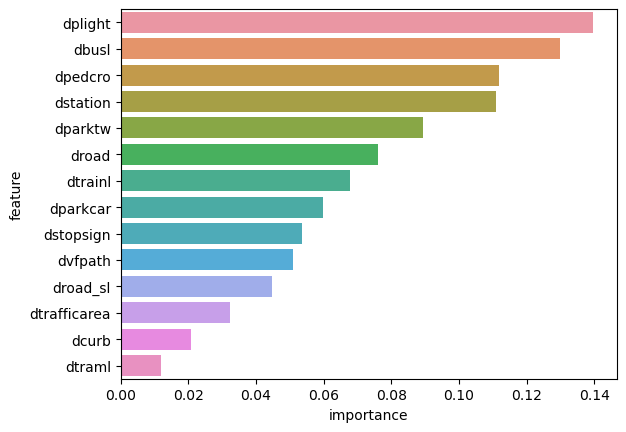

In [172]:
feature_name = list(x.columns.values.tolist())
importances = rf1.feature_importances_
df_rf1 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf1.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf1['importances'], y = df_rf1['features'])
plt.xlabel('importance')
plt.ylabel('feature')

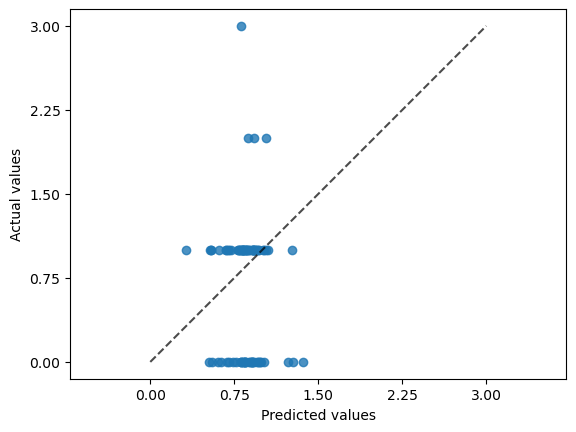

In [173]:
display = PredictionErrorDisplay.from_predictions(y_true=y_test1, 
                                                  y_pred=y_pred_rf1, 
                                                  kind  = 'actual_vs_predicted')
plt.show()

In [174]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y2, test_size = 0.25, random_state = 2)
rf2 = RandomForestRegressor(max_depth = 5, n_estimators = 10, random_state = 2)
rf2.fit(X_train2, y_train2)
y_pred_rf2 = rf2.predict(X_test2)

In [175]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test2, y_pred_rf2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test2, y_pred_rf2))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test2, y_pred_rf2, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test2, y_pred_rf2))
print('Explained Variance Score:', metrics.explained_variance_score(y_test2, y_pred_rf2))
print('Max Error:', metrics.max_error(y_test2, y_pred_rf2))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test2, y_pred_rf2))
print('Median Absolute Error:', metrics.median_absolute_error(y_test2, y_pred_rf2))
print('R^2:', metrics.r2_score(y_test2, y_pred_rf2))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test2, y_pred_rf2))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test2, y_pred_rf2))

Mean Absolute Error (MAE): 0.23986856211893437
Mean Squared Error (MSE): 0.1200198118166083
Root Mean Squared Error (RMSE): 0.34643875622771814
Mean Absolute Percentage Error (MAPE): 596622470243121.2
Explained Variance Score: -0.0915707668244532
Max Error: 0.9129358609857292
Mean Squared Log Error: 0.0615248125627162
Median Absolute Error: 0.11209652884576933
R^2: -0.0973239937518473
Mean Poisson Deviance: 0.5612056483588573


Text(0, 0.5, 'feature')

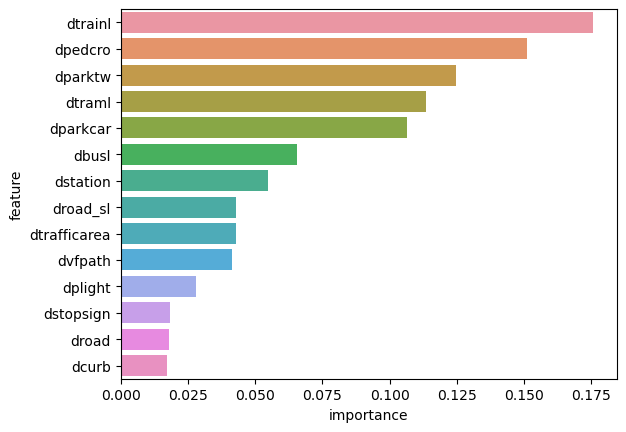

In [176]:
feature_name = list(x.columns.values.tolist())
importances = rf2.feature_importances_
df_rf2 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf2.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf2['importances'], y = df_rf2['features'])
plt.xlabel('importance')
plt.ylabel('feature')

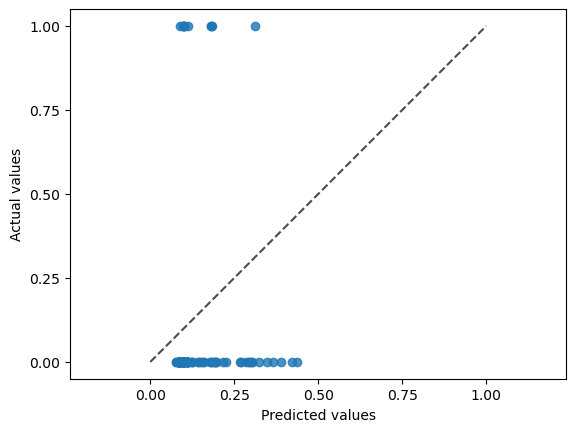

In [177]:
display = PredictionErrorDisplay.from_predictions(y_true=y_test2, 
                                                  y_pred=y_pred_rf2, 
                                                  kind  = 'actual_vs_predicted')
plt.show()

In [178]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y3, test_size = 0.25, random_state = 3)
rf3 = RandomForestRegressor(max_depth = 5, n_estimators = 30, random_state = 3)
rf3.fit(X_train3, y_train3)
y_pred_rf3 = rf3.predict(X_test3)

In [179]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test3, y_pred_rf3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test3, y_pred_rf3))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test3, y_pred_rf3, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test3, y_pred_rf3))
print('Explained Variance Score:', metrics.explained_variance_score(y_test3, y_pred_rf3))
print('Max Error:', metrics.max_error(y_test3, y_pred_rf3))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test3, y_pred_rf3))
print('Median Absolute Error:', metrics.median_absolute_error(y_test3, y_pred_rf3))
print('R^2:', metrics.r2_score(y_test3, y_pred_rf3))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test3, y_pred_rf3))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test3, y_pred_rf3))

Mean Absolute Error (MAE): 1173.2059277824662
Mean Squared Error (MSE): 3482059.4983939496
Root Mean Squared Error (RMSE): 1866.0277324825454
Mean Absolute Percentage Error (MAPE): 2.2734087839018555e+18
Explained Variance Score: -1.0841757542834798
Max Error: 11137.633723318362
Mean Squared Log Error: 25.447664216202373
Median Absolute Error: 729.4225412994651
R^2: -1.1894165101928817
Mean Poisson Deviance: 2127.6541562166713


Text(0, 0.5, 'feature')

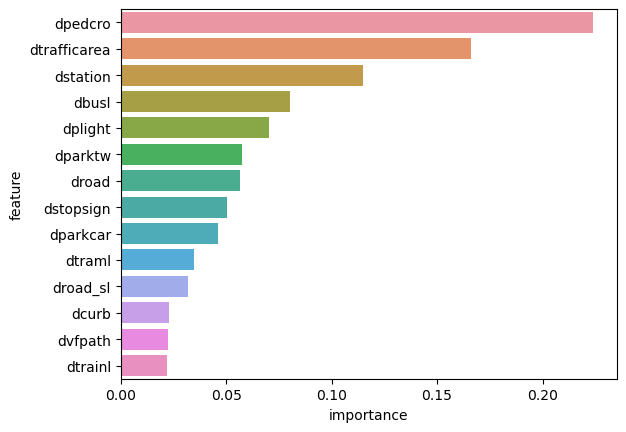

In [180]:
feature_name = list(x.columns.values.tolist())
importances = rf3.feature_importances_
df_rf3 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf3.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf3['importances'], y = df_rf3['features'])
plt.xlabel('importance')
plt.ylabel('feature')

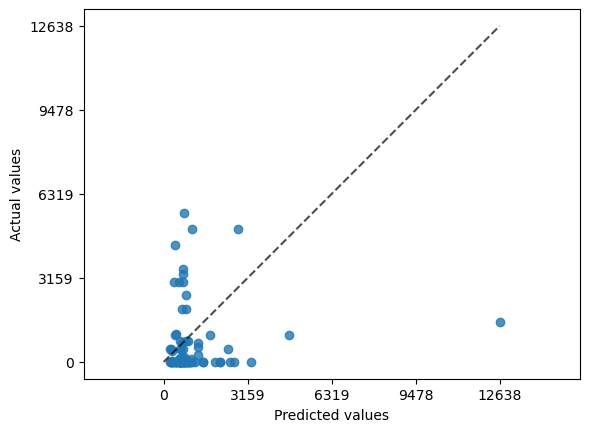

In [181]:
display = PredictionErrorDisplay.from_predictions(y_true=y_test3, 
                                                  y_pred=y_pred_rf3, 
                                                  kind  = 'actual_vs_predicted')
plt.show()